In [1]:
import io
import ipywidgets as widgets
from ipywidgets import Output
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import re
out = Output()
out_hist = Output()
path_to_project = '/home/wsl/git/Wf-Security/heuristic_and_exact_solutions/'
output_folder = 'output/20240523013449/'
output_file_name = 'wf_security_executions.csv'
file_name = path_to_project + output_folder + output_file_name

In [2]:
# desired_columns = ['makespan']
# plot_title = 'GRCH Vs HEFT (Makespan)'
# plot_y_label = "$Makespan$ (segundos)"

# desired_columns = ['cost']
# plot_title = 'GRCH Vs HEFT (Custo)'
# plot_y_label = "Custo (US$)"

desired_columns = ['security']
plot_title = 'GRCH Vs HEFT (Confidencialidade)'
plot_y_label = "Penalizações"


In [3]:
executions = pd.read_csv(file_name, header='infer')
new_executions = executions.drop(columns=['scenario', 'alpha_restricted_candidate_list', 'num_clouds', 'num_vm', 'num_buckets', 'num_crypt_requirements', 'cloud_type', 
                                          'num_allocation_experiments', 'num_conf_requirements', 'num_iterations', 'best_solution_iteration', 'best_solution_time', 
                                          'lsn_time_1', 'lsn_noi_1', 'lsn_time_2', 'lsn_noi_2', 'lsn_time_3', 'lsn_noi_3', 'time', 'object_function'])
new_executions

,algorithm,instance,alpha_time,alpha_cost,alpha_security,num_buckets,makespan,cost,security
0,heft,Montage_025,0.999990,0.000005,0.000005,16,131.0,0.020719,0.306452
1,heft,Montage_025,0.999990,0.000005,0.000005,16,131.0,0.020719,0.306452
2,heft,Montage_025,0.999990,0.000005,0.000005,16,131.0,0.020719,0.306452
3,heft,Montage_025,0.999990,0.000005,0.000005,16,131.0,0.020719,0.306452
4,heft,Montage_025,0.999990,0.000005,0.000005,16,131.0,0.020719,0.306452
...,...,...,...,...,...,...,...,...,...
235,grch,Montage_100,0.333333,0.333333,0.333333,16,489.0,0.081354,0.072495
236,grch,Montage_100,0.333333,0.333333,0.333333,16,489.0,0.080368,0.072495
237,grch,Montage_100,0.333333,0.333333,0.333333,16,489.0,0.081138,0.073561
238,grch,Montage_100,0.333333,0.333333,0.333333,16,488.0,0.081534,0.072495


In [4]:
# Cenário 1 - Ênfase no makespan
alphas_filter = new_executions[(new_executions.alpha_time == 0.999990)
                               & (new_executions.alpha_cost == 0.000005	)
                               & (new_executions.alpha_security == 0.000005)
                               & (new_executions.algorithm == 'grch')]
group_columns = ['algorithm', 'instance', 'alpha_time', 'alpha_cost', 'alpha_security']
# desired_columns = ['makespan',  'cost',  'security']
# desired_columns = ['makespan']
grouped_executions = alphas_filter.groupby(group_columns)[desired_columns].mean()

#grouped_executions

group_columns = ['algorithm', 'instance', 'alpha_time', 'alpha_cost', 'alpha_security']
# Renomear o índice
grouped_executions = grouped_executions.reset_index()
grouped_executions['Instância'] = grouped_executions.apply(
    lambda row: f"{row['instance']}", axis=1
)
grouped_executions = grouped_executions.set_index('Instância')

# Remover as colunas originais do índice antigo se não forem necessárias
grouped_executions = grouped_executions.drop(columns=group_columns)
cenario_1 = grouped_executions.rename(columns={desired_columns[0]: 'GRCH_Ênfase_Makespan'})
cenario_1

,GRCH_Ênfase_Makespan
Instância,
Montage_025,0.096774
Montage_050,0.079302
Montage_100,0.073028


In [5]:
# Cenário 2 - Ênfase no custo
alphas_filter = new_executions[(new_executions.alpha_time == 0.000005)
                               & (new_executions.alpha_cost == 0.999990)
                               & (new_executions.alpha_security == 0.000005)
                               & (new_executions.algorithm == 'grch')]
group_columns = ['algorithm', 'instance', 'alpha_time', 'alpha_cost', 'alpha_security']
# desired_columns = ['makespan',  'cost',  'security']
# desired_columns = ['makespan']
grouped_executions = alphas_filter.groupby(group_columns)[desired_columns].mean()

#grouped_executions

group_columns = ['algorithm', 'instance', 'alpha_time', 'alpha_cost', 'alpha_security']
# Renomear o índice
grouped_executions = grouped_executions.reset_index()
grouped_executions['Instância'] = grouped_executions.apply(
    lambda row: f"{row['instance']}", axis=1
)
grouped_executions = grouped_executions.set_index('Instância')

# Remover as colunas originais do índice antigo se não forem necessárias
grouped_executions = grouped_executions.drop(columns=group_columns)
cenario_2 = grouped_executions.rename(columns={desired_columns[0]: 'GRCH_Ênfase_Custo'})
cenario_2

,GRCH_Ênfase_Custo
Instância,
Montage_025,0.014516
Montage_050,0.096047
Montage_100,0.072495


In [6]:
# Cenário 3 - Ênfase na segurança
alphas_filter = new_executions[(new_executions.alpha_time == 0.000005)
                               & (new_executions.alpha_cost == 0.000005)
                               & (new_executions.alpha_security == 0.999990)
                               & (new_executions.algorithm == 'grch')]
group_columns = ['algorithm', 'instance', 'alpha_time', 'alpha_cost', 'alpha_security']
# desired_columns = ['makespan',  'cost',  'security']
# desired_columns = ['makespan']
grouped_executions = alphas_filter.groupby(group_columns)[desired_columns].mean()

#grouped_executions

group_columns = ['algorithm', 'instance', 'alpha_time', 'alpha_cost', 'alpha_security']
# Renomear o índice
grouped_executions = grouped_executions.reset_index()
grouped_executions['Instância'] = grouped_executions.apply(
    lambda row: f"{row['instance']}", axis=1
)
grouped_executions = grouped_executions.set_index('Instância')

# Remover as colunas originais do índice antigo se não forem necessárias
grouped_executions = grouped_executions.drop(columns=group_columns)
cenario_3 = grouped_executions.rename(columns={desired_columns[0]: 'GRCH_Ênfase_Confidencialidade'})
cenario_3

,GRCH_Ênfase_Confidencialidade
Instância,
Montage_025,0.0
Montage_050,0.0
Montage_100,0.0


In [7]:
# Cenário 4 - Balanceado
alphas_filter = new_executions[(new_executions.alpha_time == 0.333333)
                               & (new_executions.alpha_cost == 0.333333)
                               & (new_executions.alpha_security == 0.333333)
                               & (new_executions.algorithm == 'grch')]
group_columns = ['algorithm', 'instance', 'alpha_time', 'alpha_cost', 'alpha_security']
# desired_columns = ['makespan',  'cost',  'security']
# desired_columns = ['makespan']
grouped_executions = alphas_filter.groupby(group_columns)[desired_columns].mean()

#grouped_executions

group_columns = ['algorithm', 'instance', 'alpha_time', 'alpha_cost', 'alpha_security']
# Renomear o índice
grouped_executions = grouped_executions.reset_index()
grouped_executions['Instância'] = grouped_executions.apply(
    lambda row: f"{row['instance']}", axis=1
)
grouped_executions = grouped_executions.set_index('Instância')

# Remover as colunas originais do índice antigo se não forem necessárias
grouped_executions = grouped_executions.drop(columns=group_columns)
cenario_4 = grouped_executions.rename(columns={desired_columns[0]: 'GRCH_Objetivos_Balanceados'})
cenario_4

,GRCH_Objetivos_Balanceados
Instância,
Montage_025,0.086022
Montage_050,0.076047
Montage_100,0.072602


In [8]:
# Cenário 5 - HEFT
alphas_filter = new_executions[(new_executions.alpha_time == 0.333333)
                               & (new_executions.alpha_cost == 0.333333)
                               & (new_executions.alpha_security == 0.333333)
                               & (new_executions.algorithm == 'heft')]
group_columns = ['algorithm', 'instance', 'alpha_time', 'alpha_cost', 'alpha_security']
# desired_columns = ['makespan',  'cost',  'security']
# desired_columns = ['makespan']
grouped_executions = alphas_filter.groupby(group_columns)[desired_columns].mean()

#grouped_executions

group_columns = ['algorithm', 'instance', 'alpha_time', 'alpha_cost', 'alpha_security']
# Renomear o índice
grouped_executions = grouped_executions.reset_index()
grouped_executions['Instância'] = grouped_executions.apply(
    lambda row: f"{row['instance']}", axis=1
)
grouped_executions = grouped_executions.set_index('Instância')

# Remover as colunas originais do índice antigo se não forem necessárias
grouped_executions = grouped_executions.drop(columns=group_columns)
heft = grouped_executions.rename(columns={desired_columns[0]: 'HEFT'})
heft

,HEFT
Instância,
Montage_025,0.306452
Montage_050,0.276744
Montage_100,0.253731


In [9]:
# Concatenar os DataFrames lado a lado
df_combined = pd.concat([cenario_1, cenario_2, cenario_3, cenario_4, heft], axis=1)
df_combined

,GRCH_Ênfase_Makespan,GRCH_Ênfase_Custo,GRCH_Ênfase_Confidencialidade,GRCH_Objetivos_Balanceados,HEFT
Instância,,,,,
Montage_025,0.096774,0.014516,0.0,0.086022,0.306452
Montage_050,0.079302,0.096047,0.0,0.076047,0.276744
Montage_100,0.073028,0.072495,0.0,0.072602,0.253731


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

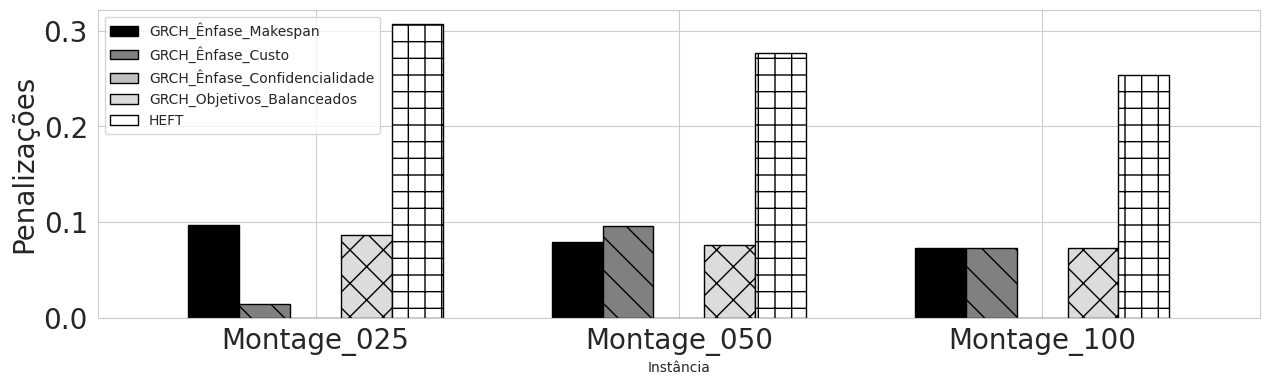

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import sqldf
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")

colorGRASP = (0.229, # redness
              0.245, # greenness
              0.249, # blueness
              0.3 # transparency
             ) 

colorExact = (0.15, # redness
              0.3, # greenness
              0.74, # blueness
              0.3 # transparency
             )

plot = df_combined.plot(kind="bar",
                        width=0.7, 
                        figsize=(15, 4), 
                        # color =['black', 'slategray', 'white', colorGRASP],
                        color =['black', 'gray', 'silver', 'gainsboro', 'white'],
                        edgecolor='black')

# Define uma lista de hachuras
hatches = ['/', '\\', '|', 'x', '+']
# hatches = ['/','/','/','/']

# Aplicar hachuras a cada barra
for i, thisbar in enumerate(plot.containers):
    for j, patch in enumerate(thisbar.get_children()):
        patch.set_hatch(hatches[i % len(hatches)])

# Rotacionar os rótulos do eixo X em 45 graus
# plt.xticks(rotation=0)

# plt.title(plot_title, fontsize=20)
# plt.xlabel("Instância do $Workflow$", fontsize = 20)
plt.ylabel(plot_y_label, fontsize = 20)

sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 1.5})
#sns.set_context("poster")
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.savefig(f'./grch_vs_heft_{desired_columns[0]}.jpg', bbox_inches='tight')
plt.plot


In [11]:
type(executions)
executions['scenario'].unique()
executions['alpha_restricted_candidate_list'].unique()
executions['num_clouds'].unique()
executions['num_vm'].unique()
executions['num_buckets'].unique()
executions['num_crypt_requirements'].unique()
executions['cloud_type'].unique()
executions['num_allocation_experiments'].unique()
executions['num_conf_requirements'].unique()
executions['num_iterations'].unique()
executions['time'].max()


18.407214